## 4-MODUL. VIZUALIZASIYA

### 4.6 **Distribution** - taqsimot
Taqsimot grafik - o'zgaruvchi (ustun)da qanday qiymatlar mavjudligi va ularning ehtimolligini ko'rsatuvchi grafik.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # agar seaborn o'rnatilmagan bo'lsa pip install seaborn

Darsimiz uchun Mercedes-Benz firmasi avtomobillari narxini jamlagan jadvalni yuklab olamiz.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/merc.csv")
df=df[df.year>=2010] # 2010-yildan keyin chiqqan mashinalarni saqlab qolamiz
df=df[df.transmission!='Other'] # Faqat avtomat, mexanik va yarim-avtomat mashinalarni olib qolamiz
df=df[df.fuelType!='Other'] # Faqat benzin, dizel va gibrid mashinalarni olib qolamiz
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2


Keling jadvaldagi narxlarning taqsimotini ko'ramiz:

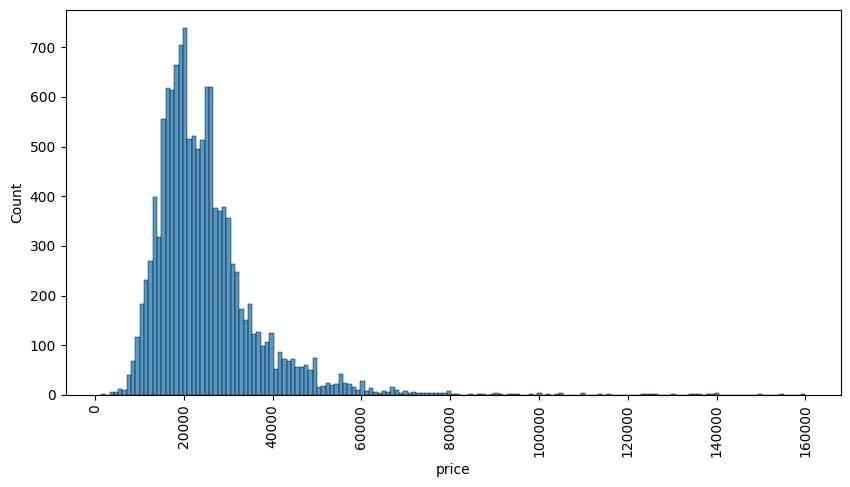

In [3]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='price')
plt.xticks(rotation=90)
plt.show()

`seaborn` da taqsimotlarni ko'rsatish uchun bir nechta funksiyalar mavjud.
Yuqorida ko'rganimiz `histplot` shulardan biri. Shuningdek, turli taqsimotlarni jamlaydigan yagona `displot` funksiyasi ham bor.

`displot` yoki `histplot` qay biridan foydalanish sizning o'zingizga bog'liq. Bu ikkisining fariq shundaku, `histplot` va biz pastroqda ko'radigan `kdeplot`,  `ecdfplot` funksiyalari yordamida chizmaga ko'proq o'zgartirishlar kiritish mumkin.

Batafsil: https://seaborn.pydata.org/generated/seaborn.displot.html

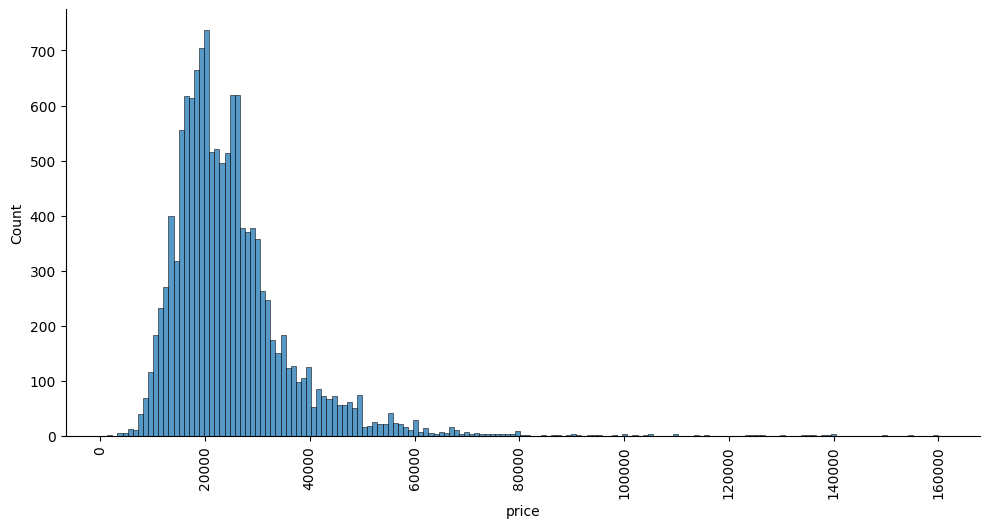

In [4]:
sns.displot(data=df, x='price', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

Yuqoridagi grafikdan aksar mashinalarning narxi 20000$ ga yaqi ekanini ko'rishimiz mumkin.

Keling jadvaldagi mashinalarning kilometri taqsimotini ko'ramiz:

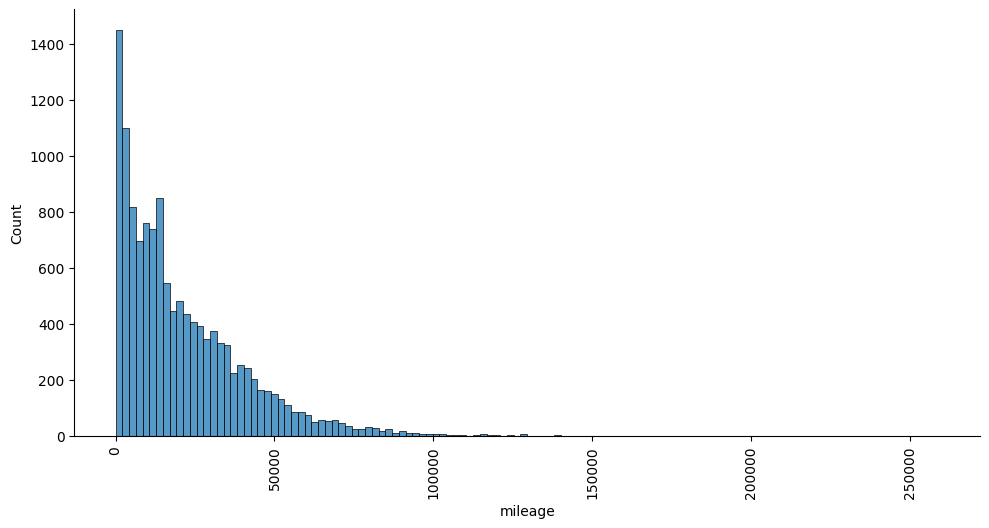

In [5]:
sns.displot(data=df, x='mileage', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

Qo'shimcha parametr

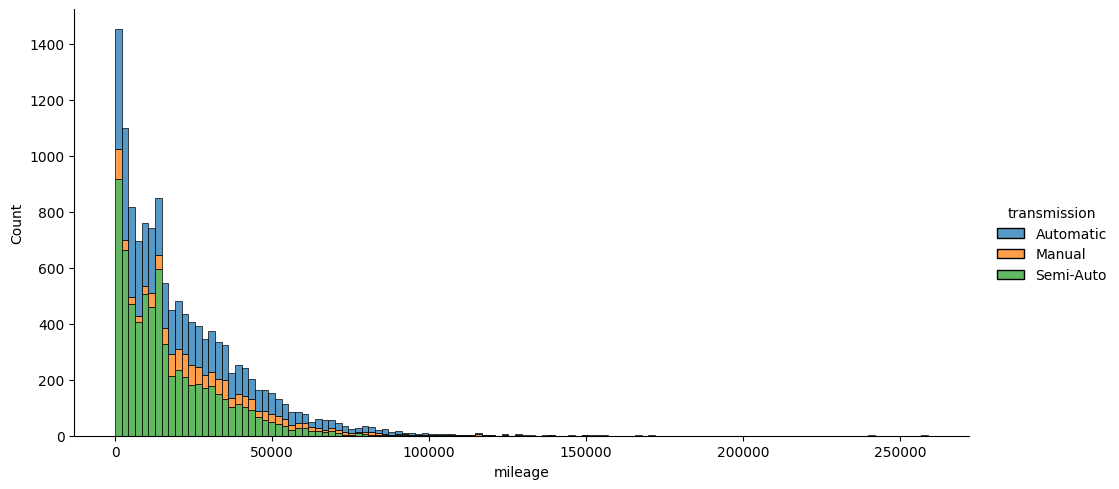

In [6]:
sns.displot(data=df, x="mileage", hue="transmission", multiple="stack", height=5, aspect=2)
plt.show()

`col` parametri yordamida har bir grafikni ajratib chizish mumkin:

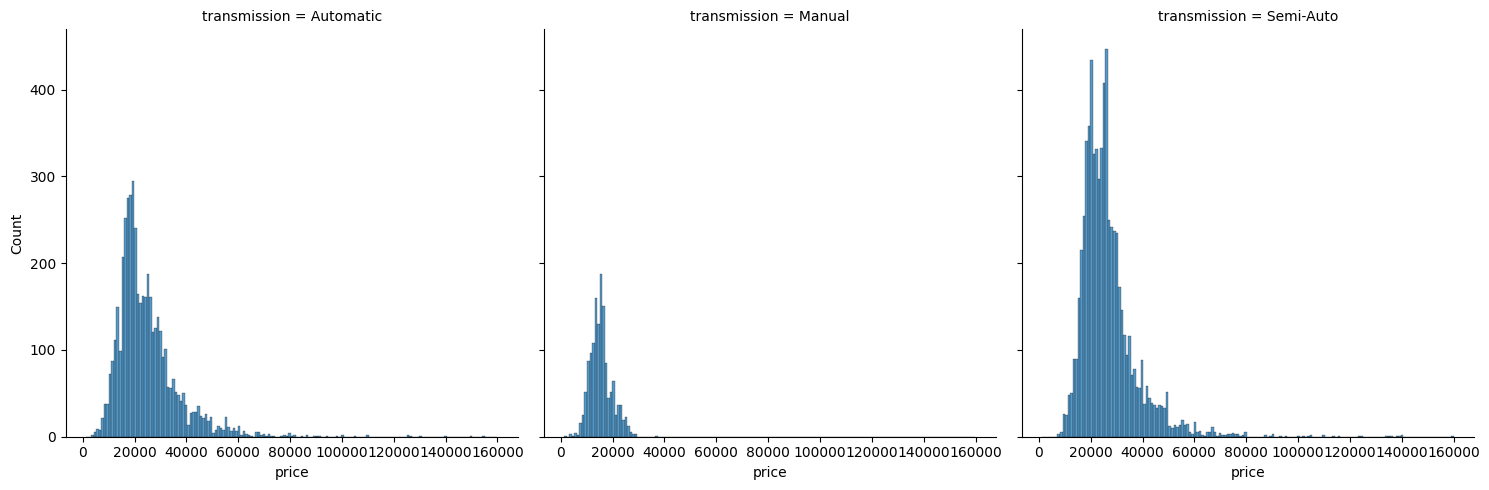

In [7]:
sns.displot(data=df, x="price", col="transmission", height=5, aspect=1)
plt.show()

### KDE - Kernel Density Estimation
Qiymatlar taqsimotini baholashning yana bir usuli bu - KDE, tasodifiy qiymatlar zichligini ko'rsatuvchi grafik.
KDE haqida to'liq ma'lumot: https://en.wikipedia.org/wiki/Kernel_density_estimation (rus tilida ham bor)

KDE grafik uchun `displot` yoki maxsus `kdeplot` funksiylaridan foydalanishimiz mumkin:

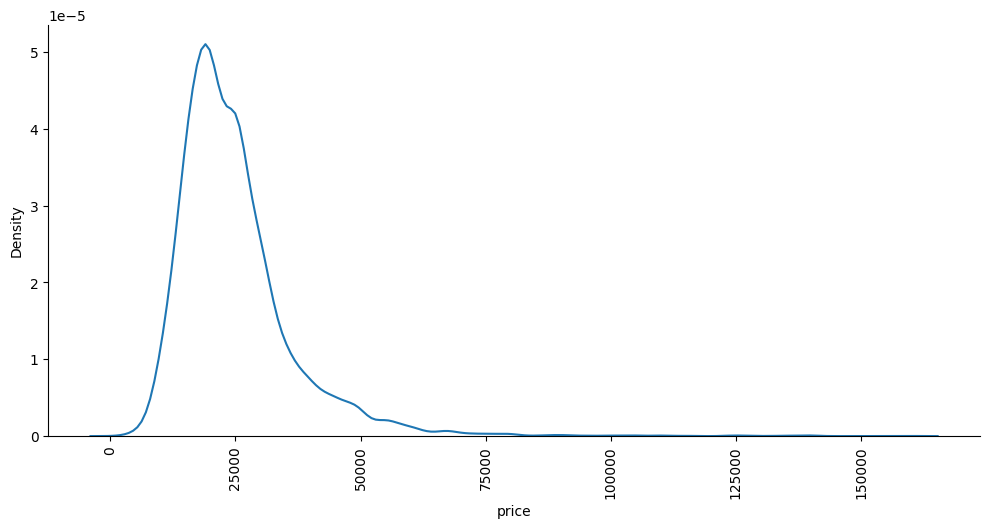

In [8]:
#displot
sns.displot(data=df, x='price', kind='kde', height=5, aspect=2) # height va aspect grafik hajmini berish uchun
plt.xticks(rotation=90)
plt.show()

`displot` yordamida Distribution va KDE jamlab chizish ham mumkin:

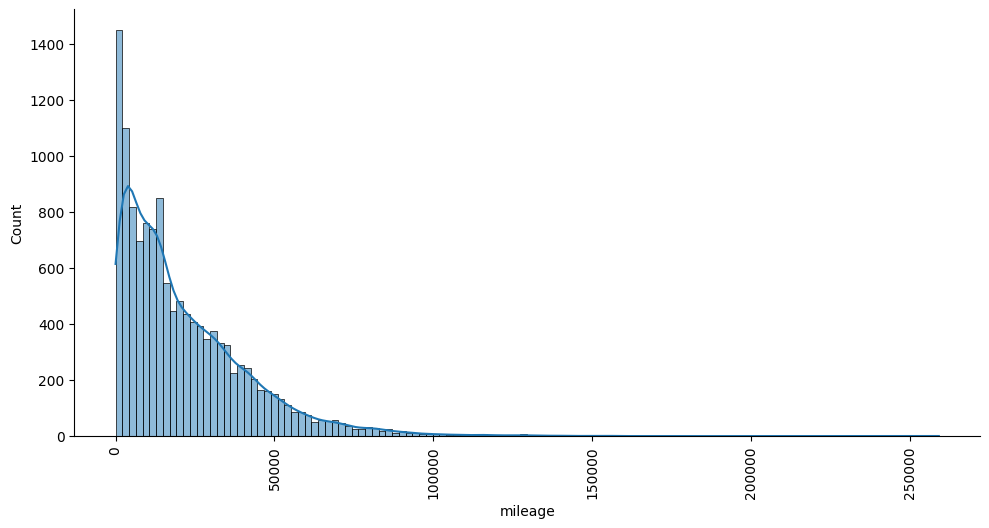

In [9]:
sns.displot(data=df, x='mileage', kde=True, height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

### `kdeplot()`

<ipython-input-10-cebea4d13052>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='price', shade=True)


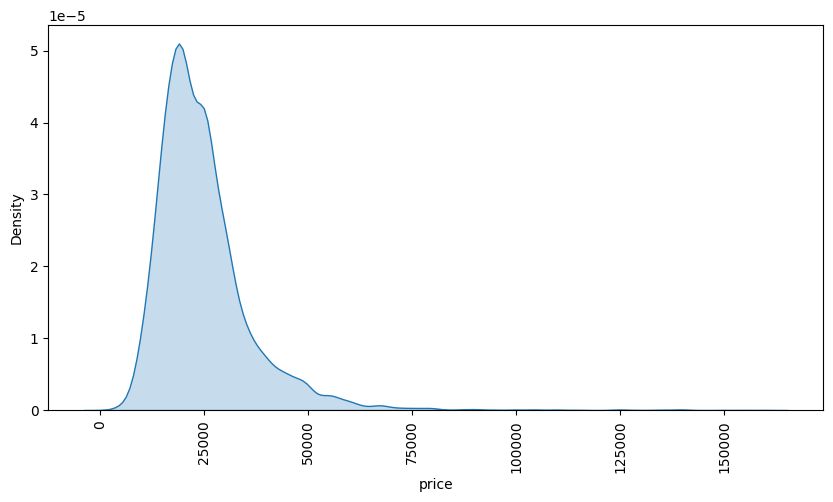

In [10]:
#kdeplot
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='price', shade=True)
plt.xticks(rotation=90)
plt.show()

`hue` parametri yordamida qo'shimcha o'zgaruvchini qo'shishimiz mumkin:

<ipython-input-11-832931602238>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='price', hue='transmission', shade=True)


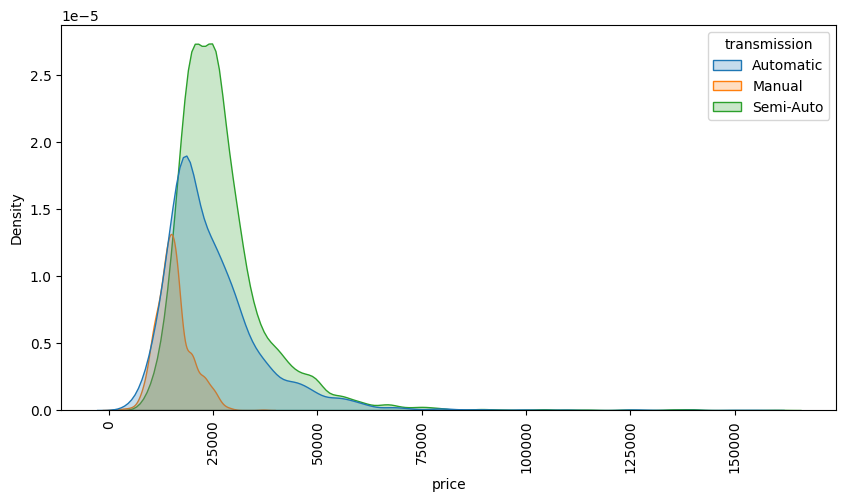

In [11]:
#kdeplot
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='price', hue='transmission', shade=True)
plt.xticks(rotation=90)
plt.show()

`displot` va `hue`

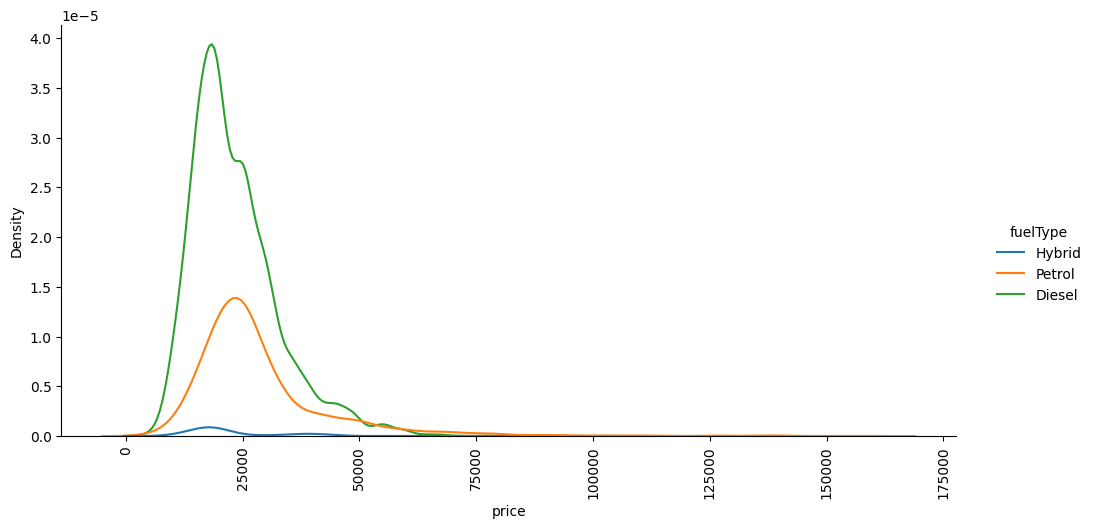

In [12]:
sns.displot(data=df, x='price', hue='fuelType', kind='kde', height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

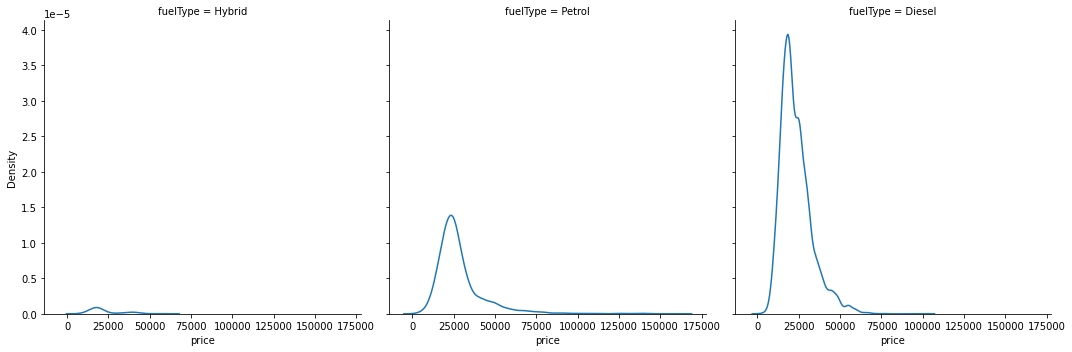

In [ ]:
sns.displot(data=df, x="price", col="fuelType", kind='kde', height=5, aspect=1)
plt.show()

### Ikki o'lchamli (2D) KDE

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
5,SL CLASS,2011,149948,Automatic,3000,Petrol,570,21.4,6.2


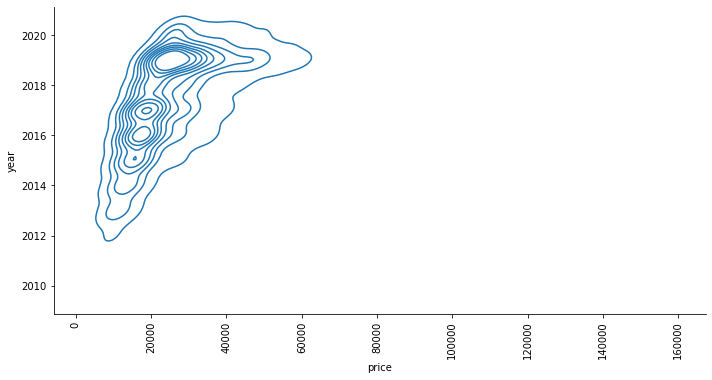

In [ ]:
sns.displot(data=df, x="price", y="year", kind="kde", height=5, aspect=2)
plt.xticks(rotation=90)
plt.show()

## CDF - cumulative distribution function
Kumulyativ taqsimot funksiyasi - berilgan qiymatning ehtimolligini ko'rsatuvchi parametr.

To'liq: https://en.wikipedia.org/wiki/Cumulative_distribution_function

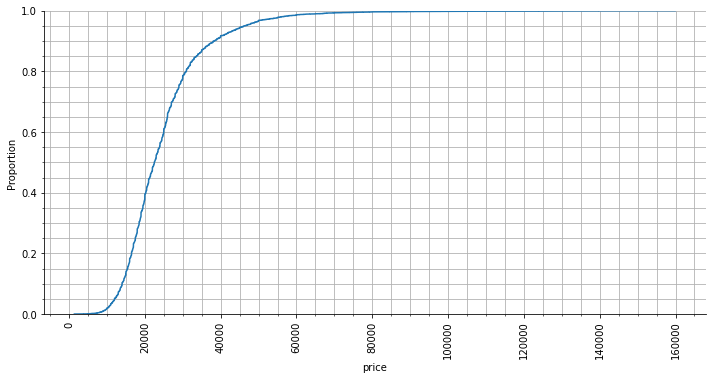

In [ ]:
sns.displot(data=df, x="price", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid(which='both') # setka (major, minor, both) qiymatlarini berib ko'ring
plt.minorticks_on()
plt.show()

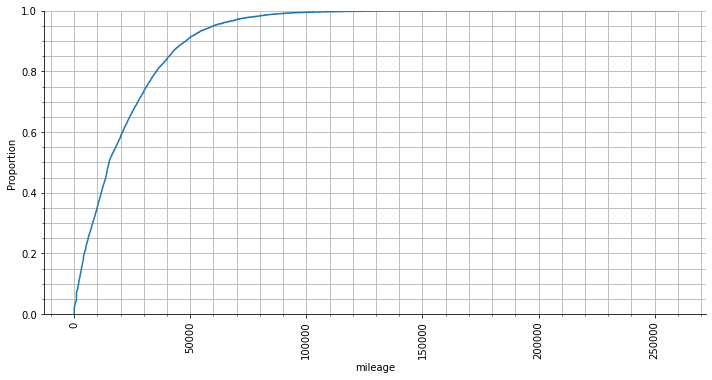

In [ ]:
sns.displot(data=df, x="mileage", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid(which='both') # setka (major, minor, both) qiymatlarini berib ko'ring
plt.minorticks_on()
plt.show()

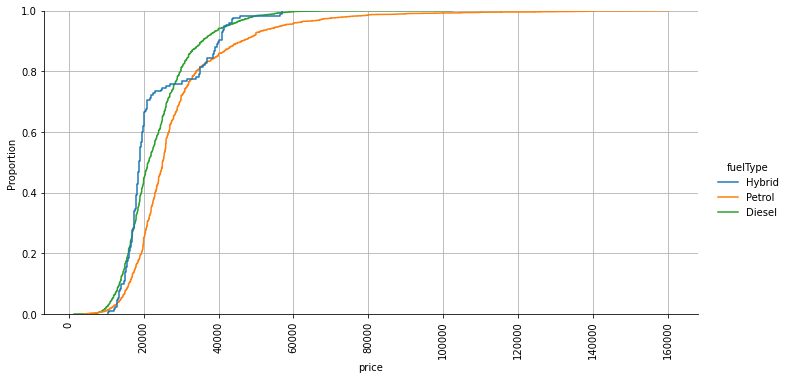

In [ ]:
sns.displot(data=df, x="price", hue="fuelType", kind="ecdf", height=5, aspect=2)
plt.xticks(rotation=90)
plt.grid()
plt.show()

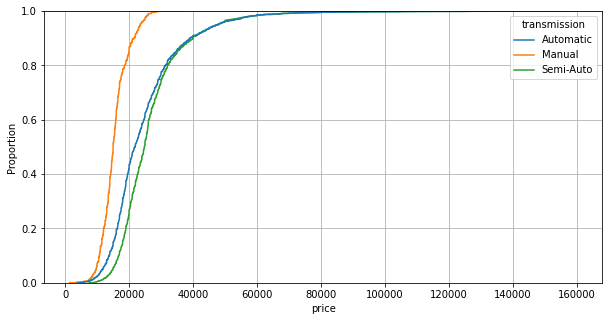

In [ ]:
plt.figure(figsize=(10,5))
sns.ecdfplot(data=df, x="price", hue="transmission")
plt.grid()
plt.show()

### displot haqida batafsil: https://seaborn.pydata.org/generated/seaborn.displot.html